In [ ]:
# Visualizing SCCmec types across S. aureus genomes in R

In [1]:
## Imported sccmec.staphopia table into R
sccmec.staphopia <- read.table("data/sccmec.staphopia.tsv", header = TRUE)
head(sccmec.staphopia)
## Combining all subtypes into a single column representing all genomes included in a ST 
library(dplyr)
library(readr)

### Define the columns to check for each group of subtypes
subtype_columns <- list( # This list specifies which columns represent subtypes that belong to the same SCCmec type
  I = c("I", "Ia"),
  II = c("II", "IIa", "IIb"),
  III = c("III", "IIIa"),
  IV = c("IV", "IVa", "IVb", "IVc", "IVd", "IVg", "IVh")
)
#### For columns V, VI, VII, VIII and IX, you can just sum and add the final value afterward since they don't have any subtypes 


,sample,I,II,III,IV,V,VI,VII,VIII,IX,⋯,Ia,IIa,IIb,IIIa,IVa,IVb,IVc,IVd,IVg,IVh
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GCA_014725595.1_ASM1472559v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,True,False
2,GCA_024741575.1_ASM2474157v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,False,False
3,GCA_014726155.1_ASM1472615v1_genomic,False,False,False,True,False,False,False,False,False,⋯,False,False,False,False,True,False,False,False,False,False
4,GCA_013307005.2_ASM1330700v2_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,True,False
5,GCA_031583105.1_ASM3158310v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,False,False
6,GCA_003203655.1_ASM320365v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,False,False



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
### Loop through each subtype group and add new columns based on conditions
for (subtype in names(subtype_columns)) { # iterates over each key in the subtype_columns list, where each key corresponds to an SCCmec type
  columns_to_check <- subtype_columns[[subtype]] # holds the names of the columns in the dataframe that represent the subtypes for the current SCCmec type
  new_column_name <- paste0(subtype, "_all") # new column name is generated by appending _all to the SCCmec type (e.g., I_all, II_all, etc.) and will represent whether any of the subtypes are present (i.e. 'True')
  
  # Add a new column based on the condition
  sccmec.staphopia <- mutate(
    sccmec.staphopia,
    !!new_column_name := ifelse( #checks if any of the selected subtype columns contain "True". If at least one column does, the new column is set to "True"; otherwise, it's set to "False"
      rowSums(select(sccmec.staphopia, all_of(columns_to_check)) == "True") > 0,
      "True",
      "False"
    )
  )
}

View(sccmec.staphopia)


sample,I,II,III,IV,V,VI,VII,VIII,IX,⋯,IVa,IVb,IVc,IVd,IVg,IVh,I_all,II_all,III_all,IV_all
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_014725595.1_ASM1472559v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,True,False,False,False,False,True
GCA_024741575.1_ASM2474157v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,False,False
GCA_014726155.1_ASM1472615v1_genomic,False,False,False,True,False,False,False,False,False,⋯,True,False,False,False,False,False,False,False,False,True
GCA_013307005.2_ASM1330700v2_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,True,False,False,False,False,True
GCA_031583105.1_ASM3158310v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,False,False
GCA_003203655.1_ASM320365v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,False,False
GCA_002000565.1_ASM200056v1_genomic,False,False,False,True,False,False,False,False,False,⋯,True,False,False,False,False,False,False,False,False,True
GCA_030290935.1_ASM3029093v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,False,False
GCA_030289715.1_ASM3028971v1_genomic,False,False,False,False,False,False,False,False,False,⋯,False,False,False,False,False,False,False,False,False,False


In [6]:
## Making a new table with summed results
sum_sccmec_staphopia <- sccmec.staphopia[, c(1, 22:25, 6:11)]
View(sum_sccmec_staphopia)

## Adding a new column with True for SCCmec negative genomes 
all_false_rows <- rowSums(sum_sccmec_staphopia[, 2:11] == "False") == ncol(sum_sccmec_staphopia[, 2:11]) # make a logical vector to store genomes with False in all columns 
transposed_data <- data.frame(`SCCmec_neg` = all_false_rows) # make a new df with the transposed data
sum_sccmec_staphopia <- cbind(sum_sccmec_staphopia, transposed_data) # append the transposed vector as a new column

write.table(sum_sccmec_staphopia, file = "sum_sccmec-staphopia", sep = "\t", row.names = FALSE, col.names = TRUE)


sample,I_all,II_all,III_all,IV_all,V,VI,VII,VIII,IX,meca
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_014725595.1_ASM1472559v1_genomic,False,False,False,True,False,False,False,False,False,True
GCA_024741575.1_ASM2474157v1_genomic,False,False,False,False,False,False,False,False,False,False
GCA_014726155.1_ASM1472615v1_genomic,False,False,False,True,False,False,False,False,False,True
GCA_013307005.2_ASM1330700v2_genomic,False,False,False,True,False,False,False,False,False,True
GCA_031583105.1_ASM3158310v1_genomic,False,False,False,False,False,False,False,False,False,False
GCA_003203655.1_ASM320365v1_genomic,False,False,False,False,False,False,False,False,False,False
GCA_002000565.1_ASM200056v1_genomic,False,False,False,True,False,False,False,False,False,True
GCA_030290935.1_ASM3029093v1_genomic,False,False,False,False,False,False,False,False,False,False
GCA_030289715.1_ASM3028971v1_genomic,False,False,False,False,False,False,False,False,False,False


In [7]:
## Correct columns names 
new_column_names <- c("Genome", "I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "mecA", "SCCmec_neg")
colnames(sum_sccmec_staphopia) <- new_column_names
colnames(sum_sccmec_staphopia)

## Correct last column issue of caps lock - Replace FALSE with False and TRUE with True in the last column
sum_sccmec_staphopia <- sum_sccmec_staphopia %>%
  mutate(SCCmec_neg = ifelse(SCCmec_neg == "TRUE", "True", "False"))

## Count 'True' hits in each category 
true_hits_counts <- colSums(sum_sccmec_staphopia[, 2:12] == "True")


[1] "Genome"     "I"          "II"         "III"        "IV"        
 [6] "V"          "VI"         "VII"        "VIII"       "IX"        
[11] "mecA"       "SCCmec_neg"

In [8]:
## Create a data frame for plotting
hit_counts_df <- data.frame(Group = names(true_hits_counts), Count = true_hits_counts)

## Reorder Group by Count in ascending order
hit_counts_df$Group <- reorder(hit_counts_df$Group, hit_counts_df$Count)

## Save the final SCCmec count table 
write.table(hit_counts_df, "SCCmec_count_table.tsv", sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE)


In [9]:
## Numbers aren't matching - check where's the error 

### Identify rows where there's a discrepancy between columns 2-10 and column 11 (identified a SCCmec type but not mecA gene)
inconsistent_rows <- sum_sccmec_staphopia %>%
  filter((I == "True" | II == "True" | III == "True" | IV == "True" | V == "True" |
          VI == "True" | VII == "True" | VIII == "True" | IX == "True") & mecA != "True")
View(inconsistent_rows) # 16

### Identify rows where there's more than one identified SCCmec type - ambiguous 
columns_to_check <- c("I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX")
multiple_sccmec_types <- sum_sccmec_staphopia %>%
  filter(rowSums(select(., all_of(columns_to_check)) == "True") > 1)
View(multiple_sccmec_types) # 184

### Find genomes with both errors
genomes_with_both_errors <- semi_join(inconsistent_rows, multiple_sccmec_types, by = "Genome")
View(genomes_with_both_errors) # no genome has both errors 


Genome,I,II,III,IV,V,VI,VII,VIII,IX,mecA,SCCmec_neg
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_013305955.1_ASM1330595v1_genomic,False,True,False,False,False,False,False,False,False,False,False
GCA_014730925.1_ASM1473092v1_genomic,False,False,False,True,False,False,False,False,False,False,False
GCA_014727015.1_ASM1472701v1_genomic,False,False,False,True,False,False,False,False,False,False,False
GCA_026625485.1_ASM2662548v1_genomic,False,False,False,True,False,False,False,False,False,False,False
GCA_018075265.1_ASM1807526v1_genomic,False,False,False,True,False,False,False,False,False,False,False
GCA_014727755.1_ASM1472775v1_genomic,False,False,False,True,False,False,False,False,False,False,False
GCA_900474755.1_41236_E02_genomic,False,False,False,True,False,False,False,False,False,False,False
GCA_018093065.1_ASM1809306v1_genomic,False,True,False,False,False,False,False,False,False,False,False
GCA_022405295.1_ASM2240529v1_genomic,False,True,False,False,False,False,False,False,False,False,False


Genome,I,II,III,IV,V,VI,VII,VIII,IX,mecA,SCCmec_neg
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_001515745.1_ASM151574v1_genomic,False,False,True,False,True,False,True,False,False,True,False
GCA_029625375.1_ASM2962537v1_genomic,False,False,False,False,True,False,True,False,False,True,False
GCA_014731855.1_ASM1473185v1_genomic,True,True,False,False,False,False,False,False,False,True,False
GCA_008934235.1_ASM893423v1_genomic,True,True,False,False,False,False,False,False,False,True,False
GCA_000709475.1_ASM70947v1_genomic,False,False,True,False,True,False,True,False,False,True,False
GCA_014730535.1_ASM1473053v1_genomic,True,False,False,True,False,False,False,False,False,True,False
GCA_001641025.1_ASM164102v1_genomic,False,False,True,False,True,False,True,False,False,True,False
GCA_008620055.1_ASM862005v1_genomic,True,True,False,False,False,False,False,False,False,True,False
GCA_014727495.1_ASM1472749v1_genomic,True,True,False,False,False,False,False,False,False,True,False


Genome,I,II,III,IV,V,VI,VII,VIII,IX,mecA,SCCmec_neg
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [10]:
# Add a new column 'Unassigned' based on the condition (multiple SCCmec types)
sum_sccmec_staphopia_CORRECT <- sum_sccmec_staphopia %>%
  mutate(Unassigned = ifelse(rowSums(select(., all_of(columns_to_check)) == "True") > 1, "True", "False"))
View(sum_sccmec_staphopia_CORRECT)

write.table(sum_sccmec_staphopia_CORRECT, "sum_sccmec-staphopia-CORRECT.tsv", sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE)

## Count 'True' hits in each category 
true_hits_counts <- colSums(sum_sccmec_staphopia_CORRECT[, 2:13] == "True")

## Create a data frame for plotting
hit_counts_df <- data.frame(Group = names(true_hits_counts), Count = true_hits_counts)

## Reorder Group by Count in ascending order
hit_counts_df$Group <- reorder(hit_counts_df$Group, hit_counts_df$Count)

write.table(hit_counts_df, "SCCmec_count_table.tsv", sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE)


Genome,I,II,III,IV,V,VI,VII,VIII,IX,mecA,SCCmec_neg,Unassigned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_014725595.1_ASM1472559v1_genomic,False,False,False,True,False,False,False,False,False,True,False,False
GCA_024741575.1_ASM2474157v1_genomic,False,False,False,False,False,False,False,False,False,False,True,False
GCA_014726155.1_ASM1472615v1_genomic,False,False,False,True,False,False,False,False,False,True,False,False
GCA_013307005.2_ASM1330700v2_genomic,False,False,False,True,False,False,False,False,False,True,False,False
GCA_031583105.1_ASM3158310v1_genomic,False,False,False,False,False,False,False,False,False,False,True,False
GCA_003203655.1_ASM320365v1_genomic,False,False,False,False,False,False,False,False,False,False,True,False
GCA_002000565.1_ASM200056v1_genomic,False,False,False,True,False,False,False,False,False,True,False,False
GCA_030290935.1_ASM3029093v1_genomic,False,False,False,False,False,False,False,False,False,False,True,False
GCA_030289715.1_ASM3028971v1_genomic,False,False,False,False,False,False,False,False,False,False,True,False


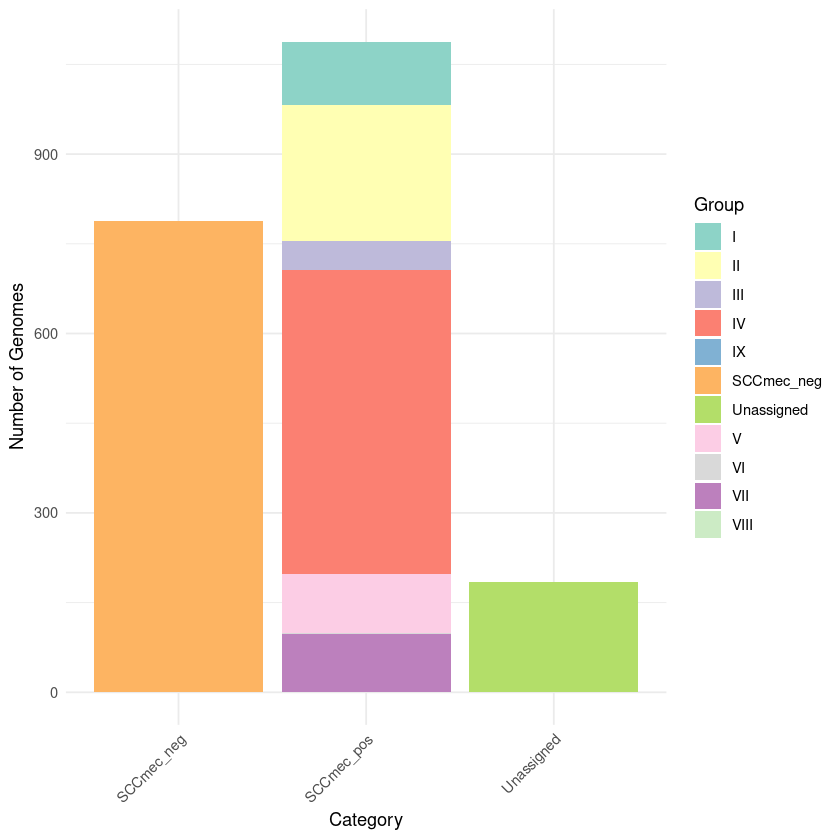

In [12]:
# I've edited it a little bit by hand and imported it back to R (added a category, in which all SCCmec types identified are in the SCCmec_pos category, I've removed mecA row and SCCmec_neg is in it's own category and the same with Unassigned)
plot_sccmec_count <- read.table("data/plot_sccmec_count.tsv", header = TRUE)
library(ggplot2)

plot_sccmec_count <- plot_sccmec_count[order(plot_sccmec_count$Category, -plot_sccmec_count$Count),]
ggplot(plot_sccmec_count, aes(x = Category, y = Count, fill = Group)) +
  geom_bar(stat = "identity") +
  labs(x = "Category", y = "Number of Genomes") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set3")  # Use a color palette from RColorBrewer
